# Bolometer stability as Tc changes
In particular, for high-Tc transitions

One important criterion determining whether a bolometer will be stable is the relationship between its (sped up by electrothermal feedback) time constant and the L/R bandwidth of the readout electronics.

This notebook explores whether a bolometer that is (marginally) stable on a "science" transition is likely to be stable on a "high-Tc" transition used for optical testing.  The answer to this question  depends on the factors determining how the time constant changes from the low to high-Tc transitions, and the change in the L/R bandwidth.

In [1]:
# Define relevant parameters
#LAT = {}
#LAT['30']= {'Lowedge':24.0, 'Upperedge':30.0, 'Popt':0.14,'Psat_highTc_req':3.2}
#LAT['40']= {'Lowedge':30.0, 'Upperedge':48.0, 'Popt':0.94,'Psat_highTc_req':17.7}
#LAT['95']= {'Lowedge':75.5, 'Upperedge':110.0, 'Popt':1.18,'Psat_highTc_req':21.2}
#LAT['150']={'Lowedge':125.0, 'Upperedge':165.0, 'Popt':2.5,'Psat_highTc_req':39.8}
#LAT['220']={'Lowedge':195.0, 'Upperedge':255.0, 'Popt':11.1,'Psat_highTc_req':109.4}
#LAT['280']={'Lowedge':255.5, 'Upperedge':300.0, 'Popt':11.8,'Psat_highTc_req':87.0}

# Psat vs Tc for the upper transition
First, let's look at how the Psat ratio (Psat_science/Psat_upper) depends on the Tc of the upper transition, for a range of values of the thermal conductivity index, n.

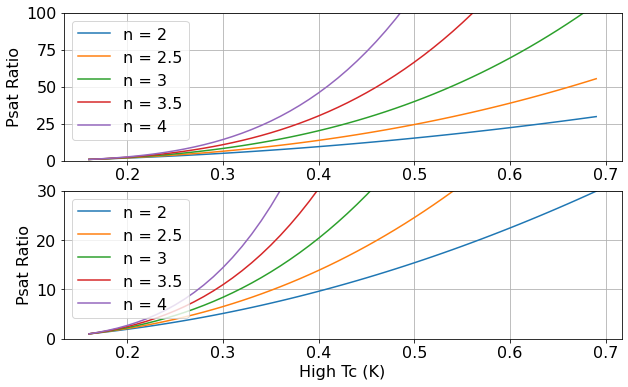

In [2]:
import matplotlib.pyplot as plt
import h5py as hp
%matplotlib inline
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [10, 6]

###### Psat_safetyfactor=3.0
#Popt = 1. # arbitrary, since we're doing everything in ratios here.
Psat_science = 1. #Psat_safetyfactor*Popt

Tc_science = 0.16
T_base = 0.1
Tc_min = 0.16
Tc_max = 0.7
Tc_upper = np.arange(Tc_min,Tc_max,0.01)

fig1, (ax1,ax2) = plt.subplots(2, 1)
# pick an n, then plot Psat_upper vs Tc
n_vec = [2,2.5,3,3.5,4]
for n in n_vec:
    scalefactor = (Tc_upper**n - T_base**n)/(Tc_science**n - T_base**n)
    Psat = Psat_science*scalefactor
    #Psat_high_highTc = Popt_high*scalefactor
    ax1.plot(Tc_upper,Psat/Psat_science,label='n = '+str(n))
    ax2.plot(Tc_upper,Psat/Psat_science,label='n = '+str(n))


ax1.set_ylim([0,100])
ax1.set_ylabel('Psat Ratio')
#y0 = LAT[band]['Psat_highTc_req']
#ax1.plot([Tc_min,Tc_max],[y0,y0],'--',label='Req')
ax1.legend(loc='upper left')
#ax1.set_title(band+' GHz band')
ax1.grid()


ax2.set_ylim([0,30])
ax2.set_xlabel('High Tc (K)')
#y0 = LAT[band]['Psat_highTc_req']/Psat_science
#ax2.plot([Tc_min,Tc_max],[y0,y0],'--',label='Req')
ax2.set_ylabel('Psat Ratio')
ax2.legend(loc='upper left')
ax2.grid()

If we are trying to design for a fixed Psat ratio, we see that lower $n$ needs higher $T_c$.

# Stability

Bolometer stability requires the detector time constant be kept longer than a timescale defined by the electronics (L/R) time constant.  Let's not worry about the proportionality factor here;  what we're concerned with is whether the detector gets significantly less likely to be stable when on the upper (high-Tc) transition than it is on the science transition.

The ratio of the detector time constants on those two transitions is related to the changes in $C$ and $G_{dyn}$ (which drive the natural time constant), and $L$, which quantifies how electrothermal feedback speeds up the natural timeconstant.

Let's look at how those evolve.  Very important parameters in this are 
- how the heat capacity $C$ scales with temperature ($\propto T^3$ for crystals, $T^1$ for normal metals),  
- $n$, the thermal conductivity index of the leg material, because of how it affects $G_{dyn}$, and
- the values of $\alpha$ for each of the transitions;  here we assume they are the same.

Let's first plot the relevant quantities for $C \propto T^1$, for a range of $n$'s.  For all parameters we will plot the ratio of a value at a given $T_{bolo}$ with that at the science transition, which is the point furthest to the left in these plots.

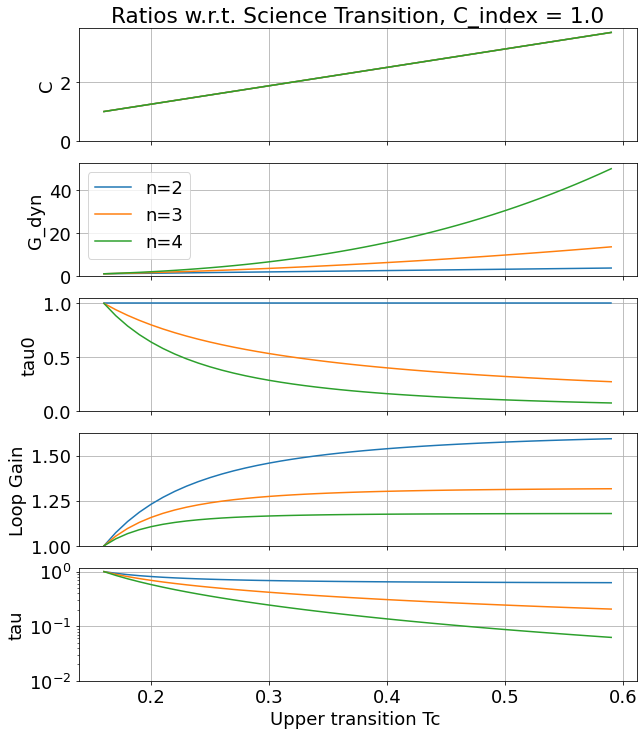

In [7]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [10, 12]

C_index = 1.  # Heat capacity index;  3 for crystaline solids, 1 for normal metals

T_c_sci = 0.16   # bolometer TES transition temperature
Tbath = 0.1    # cold bath temperature
f_safety = 3.  # Psat/Poptical
alpha = 200.   # R(T) slope in the transition, alpha = (T/R)dR/dT
C_sci = 10.        # Heat capacity of the island on science transition;  this is arbitrary but constant for this notebook.

L = 1e-6
R_sci = 0.008
tau_elec_sci = L/R_sci
R_upper = 2.5*R_sci
tau_elec_upper = L/R_upper

#band = '280'
#Psat_safetyfactor=3.0
#Popt = LAT[band]['Popt']
Psat_sci = 1. #Psat_safetyfactor*Popt

Tbolo_upper = np.arange(0.16,0.6,0.01)
C = C_sci*(Tbolo_upper/0.16)**C_index

fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1,sharex=True)
for n in [2, 3, 4]:
    k0 = Psat_sci/(T_c_sci**n - Tbath**n)  # this is one number, on science transition
    L  = alpha*(Tbolo_upper**n - Tbath**n)/(n*f_safety*Tbolo_upper**n)
    Gdyn =n*k0*Tbolo_upper**(n-1)
    tau0 = C/Gdyn
    tau = tau0/L
    nstring = 'n='+str(n)
    ax1.plot(Tbolo_upper, C/C_sci)
    ax2.plot(Tbolo_upper, Gdyn/Gdyn[0],label=nstring)
    ax3.plot(Tbolo_upper, tau0/tau0[0])
    ax4.plot(Tbolo_upper, L/L[0])
    ax5.semilogy(Tbolo_upper,tau/tau[0])

    #print('Tbolo = {0:2.3f}, Tbath = {1:2.3f}, n = {2:2.1f}, Loop gain = {3:2.1f}'.format(Tbolox,Tbath,n,L))    

ax1.set_ylabel('C')
ax1.set_ylim(bottom=0)
ax1.grid()
titlestring = 'Ratios w.r.t. Science Transition, C_index = {0:1.1f}'.format(C_index)
ax1.set_title(titlestring)

ax2.set_ylabel('G_dyn')
ax2.set_ylim(bottom=0)
ax2.legend()
ax2.grid()

ax3.set_ylabel('tau0')
ax3.set_ylim(bottom=0)
ax3.grid()

ax4.set_ylabel('Loop Gain')
ax4.set_ylim(bottom=1)
ax4.grid()

ax5.set_ylabel('tau')
ax5.set_xlabel('Upper transition Tc ')
ax5.set_ylim(bottom=0.01)
ax5.grid()


This shows that the bolometers get significantly faster for high $n$, but recall from above that higher $n$ achieves the same Psat ratio with a lower $Tc$.  

Now let's repeat for $C \propto T^3$.

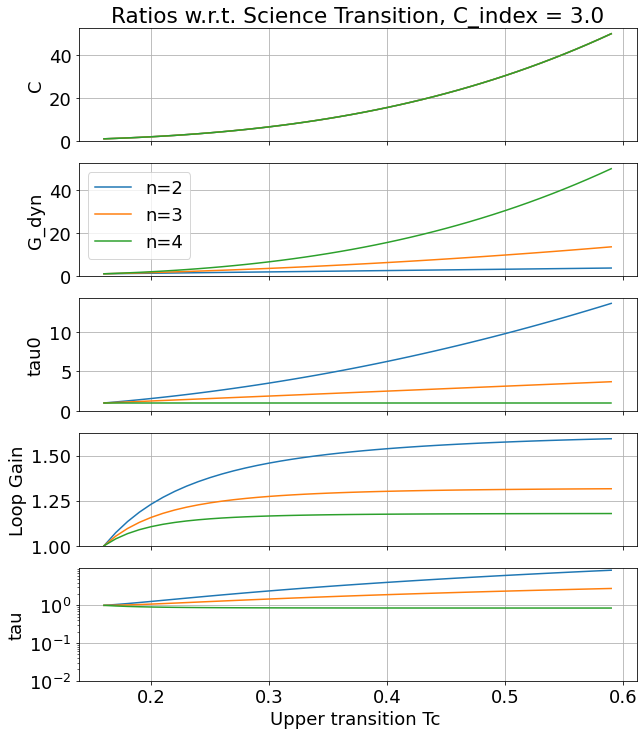

In [8]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [10, 12]

C_index = 3.  # Heat capacity index;  3 for crystaline solids, 1 for normal metals

T_c_sci = 0.16   # bolometer TES transition temperature
Tbath = 0.1    # cold bath temperature
f_safety = 3.  # Psat/Poptical
alpha = 200.   # R(T) slope in the transition, alpha = (T/R)dR/dT
C_sci = 10.        # Heat capacity of the island on science transition;  this is arbitrary but constant for this notebook.

L = 1e-6
R_sci = 0.008
tau_elec_sci = L/R_sci
R_upper = 2.5*R_sci
tau_elec_upper = L/R_upper

#band = '280'
#Psat_safetyfactor=3.0
#Popt = LAT[band]['Popt']
Psat_sci = 1.

Tbolo_upper = np.arange(0.16,0.6,0.01)
C = C_sci*(Tbolo_upper/0.16)**C_index

fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1,sharex=True)
for n in [2, 3, 4]:
    k0 = Psat_sci/(T_c_sci**n - Tbath**n)  # this is one number, on science transition
    L  = alpha*(Tbolo_upper**n - Tbath**n)/(n*f_safety*Tbolo_upper**n)
    Gdyn =n*k0*Tbolo_upper**(n-1)
    tau0 = C/Gdyn
    tau = tau0/L
    nstring = 'n='+str(n)
    ax1.plot(Tbolo_upper, C/C_sci)
    ax2.plot(Tbolo_upper, Gdyn/Gdyn[0],label=nstring)
    ax3.plot(Tbolo_upper, tau0/tau0[0])
    ax4.plot(Tbolo_upper, L/L[0])
    ax5.semilogy(Tbolo_upper,tau/tau[0])

    #print('Tbolo = {0:2.3f}, Tbath = {1:2.3f}, n = {2:2.1f}, Loop gain = {3:2.1f}'.format(Tbolox,Tbath,n,L))    

ax1.set_ylabel('C')
ax1.set_ylim(bottom=0)
ax1.grid()
titlestring = 'Ratios w.r.t. Science Transition, C_index = {0:1.1f}'.format(C_index)
ax1.set_title(titlestring)

ax2.set_ylabel('G_dyn')
ax2.set_ylim(bottom=0)
ax2.legend()
ax2.grid()

ax3.set_ylabel('tau0')
ax3.set_ylim(bottom=0)
ax3.grid()

ax4.set_ylabel('Loop Gain')
ax4.set_ylim(bottom=1)
ax4.grid()

ax5.set_ylabel('tau')
ax5.set_xlabel('Upper transition Tc ')
ax5.set_ylim(bottom=0.01)
ax5.grid()



Here we see that the fast rise in heat capacity with Tc overwhelms the increase in $G_dyn$, making the bolometers slower on the high-Tc transition for $n<4$.